In [1]:
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt

In [7]:
from sklearn.datasets import load_diabetes
diabetes = load_diabetes()

In [48]:
print(diabetes.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      - s5      ltg, possibly log of serum triglycerides level
      - s6      glu, blood sugar level

Note: Each of these 1

In [9]:
data = diabetes.data
label = diabetes.target
columns = diabetes.feature_names

In [10]:
data = pd.DataFrame(data, columns = columns)
data.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641


In [12]:
data.shape

(442, 10)

In [24]:
from sklearn.linear_model import LinearRegression
sim_lr = LinearRegression()

In [25]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, label, test_size=0.2, random_state=2023)

In [27]:
#혈당 수치
sim_lr.fit(X_train['s6'].values.reshape((-1,1)), y_train)

LinearRegression()

In [28]:
y_pred = sim_lr.predict(X_test['s6'].values.reshape((-1,1)))

In [45]:
from sklearn.metrics import r2_score

print("단순 선형 회귀, R2: {:.2f}".format(r2_score(y_test, y_pred)))
print("단순 선형 회귀 계수(w): {:.4f}, y절편(b): {:.4f}".format(sim_lr.coef_[0], sim_lr.intercept_))

단순 선형 회귀, R2: 0.16
단순 선형 회귀 계수(w): 586.7017, y절편(b): 152.5980


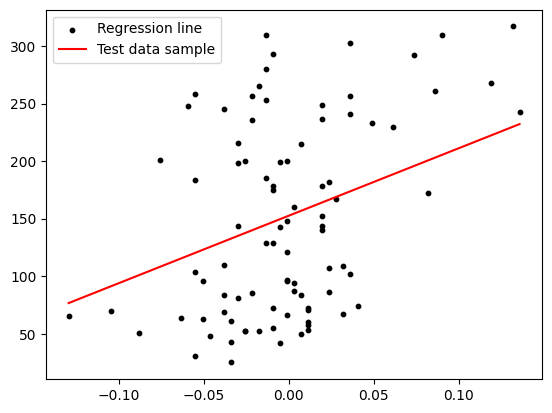

In [41]:
#linear line의 생성

line_x = np.linspace(np.min(X_test['s6']), np.max(X_test['s6']), 10)
line_y = sim_lr.predict(line_x.reshape((-1,1)))

#Test data의 표현
plt.scatter(X_test['s6'], y_test, s=10, c='black')
plt.plot(line_x, line_y, c="red")
plt.legend(['Regression line', 'Test data sample'])

In [46]:
#Multiple Linear Regression

mul_lr = LinearRegression()
mul_lr.fit(X_train, y_train)
y_pred = mul_lr.predict(X_test)

In [49]:
print("다중 선형 회귀, R2: {:.2f}".format(r2_score(y_test, y_pred)))

다중 선형 회귀, R2: 0.50


In [72]:
#평가 지표가 여러가지가 있는데 회귀모델은 R2, MSE이런 평가지표를 사용
#분류 모델은 accuracy_score로 평가

In [73]:
#Decision Tree Regressor (1개의 feature로만 학습)
from sklearn.tree import DecisionTreeRegressor
dt_regr = DecisionTreeRegressor(max_depth=5)


In [63]:
dt_regr.fit(X_train['s6'].values.reshape((-1,1)), y_train)

DecisionTreeRegressor(max_depth=5)

In [64]:
y_pred = dt_regr.predict(X_test['s6'].values.reshape((-1,1)))

In [65]:
print("단순 결정 트리 회귀 R2: {:.2f}".format(r2_score(y_test, y_pred)))

단순 결정 트리 회귀 R2: 0.14


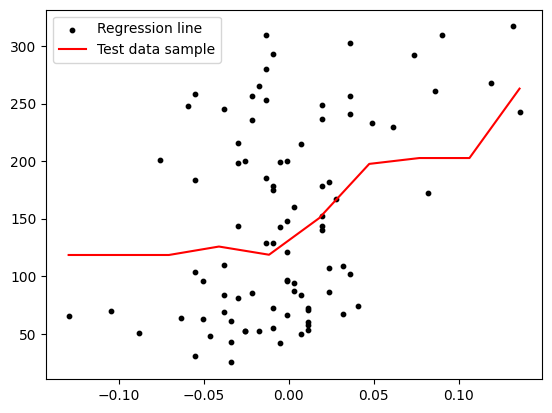

In [66]:
#linear line의 생성

line_x = np.linspace(np.min(X_test['s6']), np.max(X_test['s6']), 10)
line_y = dt_regr.predict(line_x.reshape((-1,1)))

#Test data의 표현
plt.scatter(X_test['s6'], y_test, s=10, c='black')
plt.plot(line_x, line_y, c="red")
plt.legend(['Regression line', 'Test data sample'])

In [74]:
#Decision Tree Regressor (모든 feature로 학습)

dt_regr.fit(X_train, y_train)
y_pred = dt_regr.predict(X_test)
print("단순 결정 트리 회귀 R2: {:.2f}".format(r2_score(y_test, y_pred)))

단순 결정 트리 회귀 R2: 0.31


/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:84: FutureWarning: In a future version, DataFrame.min(axis=None) will return a scalar min over the entire DataFrame. To retain the old behavior, use 'frame.min(axis=0)' or just 'frame.min()'
  return reduction(axis=axis, out=out, **passkwargs)
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:84: FutureWarning: In a future version, DataFrame.max(axis=None) will return a scalar max over the entire DataFrame. To retain the old behavior, use 'frame.max(axis=0)' or just 'frame.max()'
  return reduction(axis=axis, out=out, **passkwargs)
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


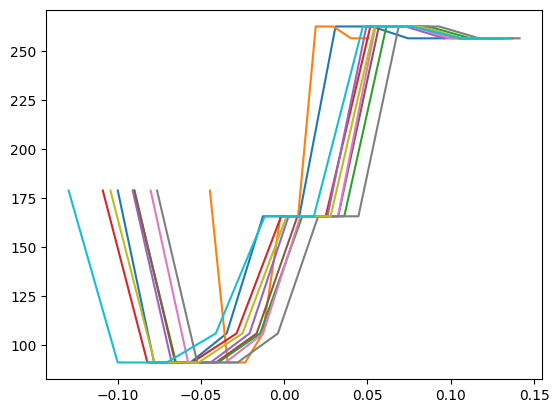

In [88]:
#linear line의 생성

line_x = np.linspace(np.min(X_test), np.max(X_test), 10)
line_y = dt_regr.predict(line_x)

#Test data의 표현
#plt.scatter(X_test, y_test, c='black')
#라벨(y_test)하나의 features(X_test)의 값이 여러 값들이기 때문에 데이터 수가 서로 안맞는다.
plt.plot(line_x, line_y)

In [80]:
#Support Vector Machine Regressor

from sklearn.svm import SVR
svm_regre = SVR()
svm_regre.fit(X_train['s6'].values.reshape((-1,1)), y_train)
y_pred = svm_regre.predict(X_test['s6'].values.reshape((-1,1)))
print("단순 서포트 벡터 머신 회귀, R2: {:.2f}".format(r2_score(y_test, y_pred)))

단순 서포트 벡터 머신 회귀, R2: 0.06


In [84]:
svm_regr = SVR(C=2)
svm_regr.fit(X_train, y_train)
y_pred = svm_regr.predict(X_test)
print('다중 서포트 벡터 머신 회귀, R2: {:.2f}'.format(r2_score(y_test, y_pred)))

다중 서포트 벡터 머신 회귀, R2: 0.29


In [86]:
#너무 변화를 따라가서 새로운 데이터가 왔을 때 예측을 하지 못하기 때문에
#일부터 C값을 줄여서 둔하게 하여 trand를 잘 따라가게 한다.

In [87]:
for i in [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]:
  m_regr = SVR(C=i)
  m_regr.fit(X_train, y_train)
  y_pred = m_regr.predict(X_test)
  print('다중 서포트 벡터 머신 회귀,i={} R2: {:.2f}'.format(i, r2_score(y_test, y_pred)))


다중 서포트 벡터 머신 회귀,i=1 R2: 0.17
다중 서포트 벡터 머신 회귀,i=2 R2: 0.29
다중 서포트 벡터 머신 회귀,i=3 R2: 0.35
다중 서포트 벡터 머신 회귀,i=4 R2: 0.39
다중 서포트 벡터 머신 회귀,i=5 R2: 0.42
다중 서포트 벡터 머신 회귀,i=6 R2: 0.44
다중 서포트 벡터 머신 회귀,i=7 R2: 0.46
다중 서포트 벡터 머신 회귀,i=8 R2: 0.47
다중 서포트 벡터 머신 회귀,i=9 R2: 0.48
다중 서포트 벡터 머신 회귀,i=10 R2: 0.49
다중 서포트 벡터 머신 회귀,i=11 R2: 0.49
다중 서포트 벡터 머신 회귀,i=12 R2: 0.50
다중 서포트 벡터 머신 회귀,i=13 R2: 0.50
다중 서포트 벡터 머신 회귀,i=14 R2: 0.50
다중 서포트 벡터 머신 회귀,i=15 R2: 0.50
다중 서포트 벡터 머신 회귀,i=16 R2: 0.50
다중 서포트 벡터 머신 회귀,i=17 R2: 0.50
다중 서포트 벡터 머신 회귀,i=18 R2: 0.50
다중 서포트 벡터 머신 회귀,i=19 R2: 0.50
다중 서포트 벡터 머신 회귀,i=20 R2: 0.50


In [91]:
#Multi Layer Perceptron Regressor

from sklearn.neural_network import MLPRegressor
mlp_regr = MLPRegressor(hidden_layer_sizes=200,max_iter=400)
mlp_regr.fit(X_train, y_train)
y_pred = mlp_regr.predict(X_test)
print("다중 MLP 회귀 R2: {:.2f}".format(r2_score(y_test, y_pred)))

다중 MLP 회귀 R2: 0.06


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(
